In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

import keras
import sklearn
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

2023-05-19 00:15:38.412093: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-05-19 00:15:38.412149: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


# Import the data

In [2]:
training = pd.read_csv("data training polos.csv")
test = pd.read_csv("testing_data.csv")

training = training[["Peruntukan","Pusat_kota","Visibilitas","Bangunan","Luas"]]
test = test[["Peruntukan","Pusat_kota","Visibilitas","Bangunan","Luas"]]

# Data visualisasi

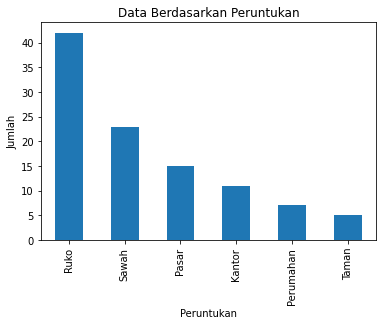

In [3]:
df = pd.read_csv('rumus + data skripsi angka polos jarak dan visibilitas 2.csv')

df['Peruntukan'].value_counts().plot(kind='bar')
plt.xlabel('Peruntukan')
plt.ylabel('Jumlah')
plt.title('Data Berdasarkan Peruntukan')
plt.show()

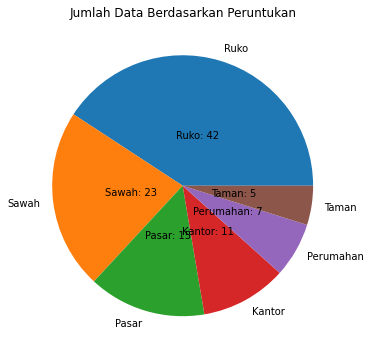

In [4]:
import pandas as pd
import matplotlib.pyplot as plt



# Menghitung jumlah data pada setiap kategori
peruntukan_counts = df['Peruntukan'].value_counts()

# Membuat pie chart
plt.figure(figsize=(8, 6))
patches, texts = plt.pie(peruntukan_counts, labels=peruntukan_counts.index)

# Menampilkan jumlah data pada setiap kategori
for i, (patch, text) in enumerate(zip(patches, texts)):
    angle = (patch.theta2 - patch.theta1) / 2.0 + patch.theta1
    x = 0.4 * np.cos(np.deg2rad(angle))
    y = 0.4 * np.sin(np.deg2rad(angle))
    plt.text(x, y, f"{peruntukan_counts.index[i]}: {peruntukan_counts[i]}", ha='center', va='center')

plt.title('Jumlah Data Berdasarkan Peruntukan')
plt.show()


# Change categorical to number 

In [5]:
condition = [  training.Pusat_kota == "Pusat",
             training.Pusat_kota == "Sedang",
              training.Pusat_kota == "Pinggir",
]

value = [3,2,1]

training.Pusat_kota = np.select(condition,value)
####
####

condition = [  training.Visibilitas == "Strategis",
             training.Visibilitas == "Sedang",
              training.Visibilitas == "Kurang",
]

value = [3,2,1]

training.Visibilitas = np.select(condition,value)
#####
#####

condition = [  training.Bangunan == "Bagus",
             training.Bangunan == "Sedang",
             
]

value = [2,1]

training.Bangunan = np.select(condition,value,0)


condition = [ 
            training.Peruntukan == "Pasar",
             training.Peruntukan == "Kantor",
             training.Peruntukan == "Ruko",
             training.Peruntukan == "Taman",
             training.Peruntukan == "Perumahan",
             training.Peruntukan == "Sawah",
             
]

value = [5,4,3,2,1,0]

training.Peruntukan = np.select(condition,value,0)

In [6]:
condition = [  test.Pusat_kota == "Pusat",
             test.Pusat_kota == "Sedang",
              test.Pusat_kota == "Pinggir",
]

value = [3,2,1]

test.Pusat_kota = np.select(condition,value)
####
####

condition = [  test.Visibilitas == "Strategis",
             test.Visibilitas == "Sedang",
              test.Visibilitas == "Kurang",
]

value = [3,2,1]

test.Visibilitas = np.select(condition,value)
#####
#####

condition = [  test.Bangunan == "Bagus",
             test.Bangunan == "Sedang",
             
]

value = [2,1]

test.Bangunan = np.select(condition,value,0)


condition = [ 
            test.Peruntukan == "Pasar",
             test.Peruntukan == "Kantor",
             test.Peruntukan == "Ruko",
             test.Peruntukan == "Taman",
             test.Peruntukan == "Perumahan",
             test.Peruntukan == "Sawah",
             
]

value = [5,4,3,2,1,0]

test.Peruntukan = np.select(condition,value,0)

In [7]:
training

,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas
0,3,3,3,2,70
1,3,3,3,2,90
2,3,3,3,2,90
3,3,3,3,2,100
4,3,3,3,2,150
...,...,...,...,...,...
85,0,1,1,0,45000
86,5,3,3,2,55157
87,1,2,1,1,57945
88,1,2,1,1,87580


In [8]:
test

,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas
0,4,3,3,2,1192
1,4,3,2,2,997
2,5,3,3,2,14060
3,5,3,3,1,6025
4,0,1,1,0,10390
5,0,1,1,0,7745
6,0,1,1,0,5700
7,1,2,3,1,27024
8,1,1,2,1,8740
9,3,3,3,2,3614


# Dataframe to Dataset

In [9]:
def df_to_dataset(dataframe, shuffle=False, batch_size=4):
  dataframe = dataframe.copy()
  labels = dataframe.pop('Peruntukan')
  ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
  if shuffle:
    ds = ds.shuffle(buffer_size=len(dataframe))
  ds = ds.batch(batch_size)
  return ds

In [10]:
train_ds = df_to_dataset(training)
val_ds = df_to_dataset(test)

2023-05-19 00:15:47.782175: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-05-19 00:15:47.782228: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2023-05-19 00:15:47.782261: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gusanwa): /proc/driver/nvidia/version does not exist
2023-05-19 00:15:47.782637: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Feature Normalizer

In [11]:
def get_normalization_layer(name, dataset):
  # Create a Normalization layer for the feature.
  normalizer = layers.Normalization(axis=None)

  # Prepare a Dataset that only yields the feature.
  feature_ds = dataset.map(lambda x, y: x[name])

  # Learn the statistics of the data.
  normalizer.adapt(feature_ds)

  return normalizer

In [12]:
all_inputs = []
encoded_features = []

# Numerical features.
for header in ["Pusat_kota","Visibilitas","Bangunan","Luas"]:
  numeric_col = tf.keras.Input(shape=(1,), name=header)
  normalization_layer = get_normalization_layer(header, train_ds)
  encoded_numeric_col = normalization_layer(numeric_col)
  all_inputs.append(numeric_col)
  encoded_features.append(encoded_numeric_col)

In [13]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])


# Model build

In [14]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(32, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.5)(x)
output = tf.keras.layers.Dense(6)(x)

model = tf.keras.Model(all_inputs, output)

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics="accuracy")

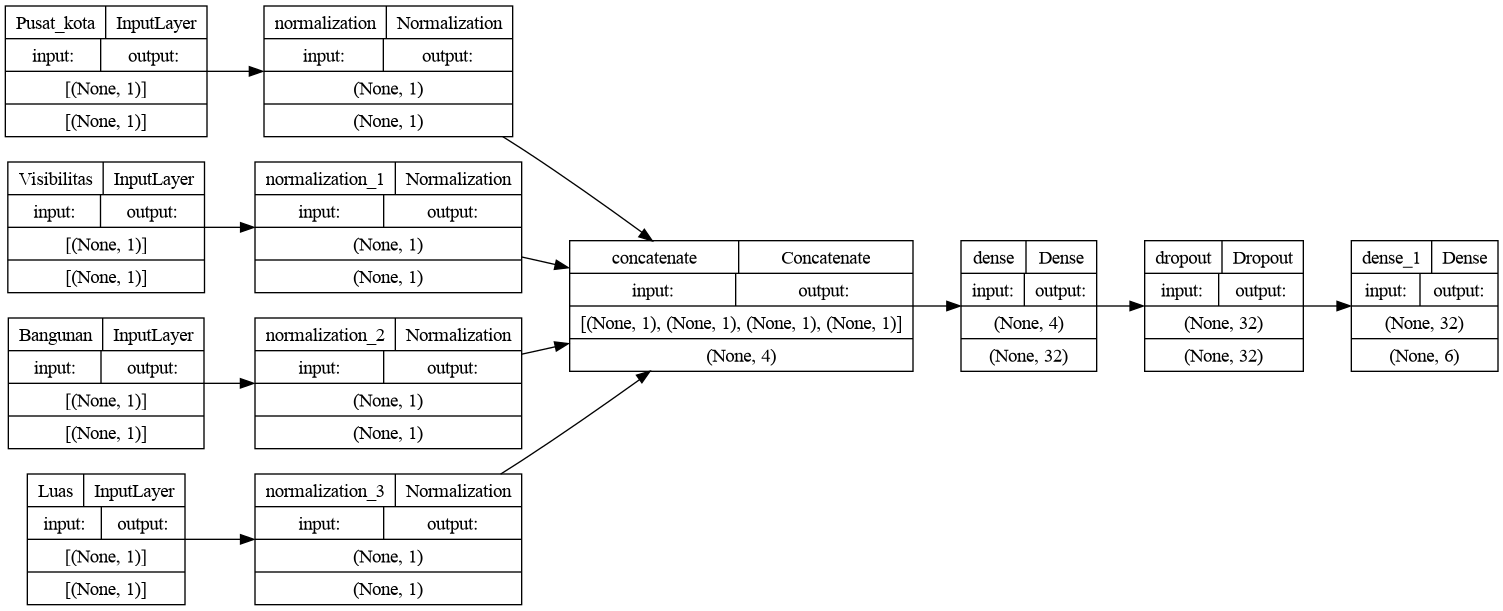

In [15]:
# Use `rankdir='LR'` to make the graph horizontal.
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [16]:
model.fit(train_ds, epochs=100, validation_data=val_ds)

Epoch 1/100
23/23 [==============================] - 2s 21ms/step - loss: 1.9509 - accuracy: 0.1889 - val_loss: 1.7653 - val_accuracy: 0.1538
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 1.8158 - accuracy: 0.2333 - val_loss: 1.6627 - val_accuracy: 0.3846
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 1.5678 - accuracy: 0.3667 - val_loss: 1.5786 - val_accuracy: 0.3846
Epoch 4/100
23/23 [==============================] - 0s 3ms/step - loss: 1.4912 - accuracy: 0.4111 - val_loss: 1.5082 - val_accuracy: 0.3846
Epoch 5/100
23/23 [==============================] - 0s 6ms/step - loss: 1.4572 - accuracy: 0.4333 - val_loss: 1.4482 - val_accuracy: 0.3846
Epoch 6/100
23/23 [==============================] - 0s 5ms/step - loss: 1.3436 - accuracy: 0.4444 - val_loss: 1.4015 - val_accuracy: 0.3846
Epoch 7/100
23/23 [==============================] - 0s 4ms/step - loss: 1.3536 - accuracy: 0.5111 - val_loss: 1.3625 - val_accuracy: 0.5385
Epoch 8/100


Epoch 59/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4920 - accuracy: 0.8333 - val_loss: 1.4311 - val_accuracy: 0.5385
Epoch 60/100
23/23 [==============================] - 0s 3ms/step - loss: 0.4496 - accuracy: 0.8333 - val_loss: 1.4420 - val_accuracy: 0.5385
Epoch 61/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4312 - accuracy: 0.8444 - val_loss: 1.4453 - val_accuracy: 0.5385
Epoch 62/100
23/23 [==============================] - 0s 4ms/step - loss: 0.5334 - accuracy: 0.7889 - val_loss: 1.4489 - val_accuracy: 0.6154
Epoch 63/100
23/23 [==============================] - 0s 5ms/step - loss: 0.4965 - accuracy: 0.7556 - val_loss: 1.4446 - val_accuracy: 0.6154
Epoch 64/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4624 - accuracy: 0.7889 - val_loss: 1.4485 - val_accuracy: 0.5385
Epoch 65/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4802 - accuracy: 0.8222 - val_loss: 1.4608 - val_accuracy: 0.6154
Epoch 

Epoch 1/100
23/23 [==============================] - 0s 4ms/step - loss: 0.4522 - accuracy: 0.8000 - val_loss: 1.6937 - val_accuracy: 0.6154
Epoch 2/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3378 - accuracy: 0.8667 - val_loss: 1.6954 - val_accuracy: 0.6154
Epoch 3/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3651 - accuracy: 0.8556 - val_loss: 1.6946 - val_accuracy: 0.6154
Epoch 4/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3555 - accuracy: 0.8333 - val_loss: 1.7058 - val_accuracy: 0.6154
Epoch 5/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3814 - accuracy: 0.8222 - val_loss: 1.7060 - val_accuracy: 0.6154
Epoch 6/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3732 - accuracy: 0.8556 - val_loss: 1.7080 - val_accuracy: 0.6154
Epoch 7/100
23/23 [==============================] - 0s 5ms/step - loss: 0.3889 - accuracy: 0.8111 - val_loss: 1.7073 - val_accuracy: 0.6154
Epoch 8/100
2

Epoch 59/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3184 - accuracy: 0.8444 - val_loss: 2.1042 - val_accuracy: 0.6154
Epoch 60/100
23/23 [==============================] - 0s 4ms/step - loss: 0.3802 - accuracy: 0.8000 - val_loss: 2.1064 - val_accuracy: 0.6154
Epoch 61/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2925 - accuracy: 0.8667 - val_loss: 2.1108 - val_accuracy: 0.6154
Epoch 62/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2796 - accuracy: 0.8444 - val_loss: 2.1086 - val_accuracy: 0.6154
Epoch 63/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2914 - accuracy: 0.8667 - val_loss: 2.1113 - val_accuracy: 0.6154
Epoch 64/100
23/23 [==============================] - 0s 4ms/step - loss: 0.2738 - accuracy: 0.8444 - val_loss: 2.1123 - val_accuracy: 0.6154
Epoch 65/100
23/23 [==============================] - 0s 3ms/step - loss: 0.3232 - accuracy: 0.8556 - val_loss: 2.1073 - val_accuracy: 0.6154
Epoch 

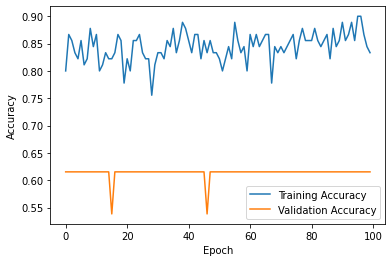

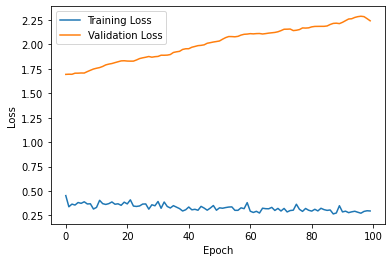

In [17]:
import matplotlib.pyplot as plt

history = model.fit(train_ds, epochs=100, validation_data=val_ds)

# Get the training and validation metrics from the history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
train_loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot accuracy
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [29]:
print('Best validation accuracy:', max(history.history['val_accuracy']))


Best validation accuracy: 0.6153846383094788


In [18]:
test

,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas
0,4,3,3,2,1192
1,4,3,2,2,997
2,5,3,3,2,14060
3,5,3,3,1,6025
4,0,1,1,0,10390
5,0,1,1,0,7745
6,0,1,1,0,5700
7,1,2,3,1,27024
8,1,1,2,1,8740
9,3,3,3,2,3614


In [19]:
model.predict(val_ds)

array([[-13.815758  , -11.965341  ,  -7.4113264 ,   3.7801762 ,
         -6.0559235 ,   3.1680088 ],
       [-12.459812  ,  -8.056063  ,  -9.24259   ,   2.74345   ,
         -2.4485164 ,   0.41651446],
       [-13.833385  , -11.177814  ,  -7.088509  ,   3.3534496 ,
         -6.345757  ,   3.7060165 ],
       [ -8.765927  ,  -8.330719  ,  -1.521176  ,   2.7137783 ,
         -8.371266  ,  -0.8017515 ],
       [  8.575518  ,   0.7883631 ,  -4.4844093 , -10.281723  ,
         -9.297896  , -14.323506  ],
       [  8.529499  ,   0.6045871 ,  -4.6229005 , -10.160084  ,
         -9.387111  , -14.539269  ],
       [  8.467771  ,   0.45614004,  -4.7732925 , -10.056137  ,
         -9.437159  , -14.718532  ],
       [ -3.9333875 ,  -4.593017  ,  -0.47434738,  -1.0229683 ,
         -4.9960117 ,  -1.5337229 ],
       [  2.3548627 ,  -1.2507178 ,  -4.324937  ,  -6.8682685 ,
         -1.3838468 ,  -7.022672  ],
       [-13.758719  , -11.738118  ,  -7.2582073 ,   3.6080167 ,
         -5.995881  ,   3.4

In [20]:
import numpy as np

y_pred = model.predict(val_ds)

         #   test.Peruntukan == "Pasar",
          #   test.Peruntukan == "Kantor",
           #  test.Peruntukan == "Ruko",
            # test.Peruntukan == "Taman",
             #test.Peruntukan == "Perumahan",
             #test.Peruntukan == "Sawah",
            
         #   value = [5,4,3,2,1,0]
y_pred



array([[-13.815758  , -11.965341  ,  -7.4113264 ,   3.7801762 ,
         -6.0559235 ,   3.1680088 ],
       [-12.459812  ,  -8.056063  ,  -9.24259   ,   2.74345   ,
         -2.4485164 ,   0.41651446],
       [-13.833385  , -11.177814  ,  -7.088509  ,   3.3534496 ,
         -6.345757  ,   3.7060165 ],
       [ -8.765927  ,  -8.330719  ,  -1.521176  ,   2.7137783 ,
         -8.371266  ,  -0.8017515 ],
       [  8.575518  ,   0.7883631 ,  -4.4844093 , -10.281723  ,
         -9.297896  , -14.323506  ],
       [  8.529499  ,   0.6045871 ,  -4.6229005 , -10.160084  ,
         -9.387111  , -14.539269  ],
       [  8.467771  ,   0.45614004,  -4.7732925 , -10.056137  ,
         -9.437159  , -14.718532  ],
       [ -3.9333875 ,  -4.593017  ,  -0.47434738,  -1.0229683 ,
         -4.9960117 ,  -1.5337229 ],
       [  2.3548627 ,  -1.2507178 ,  -4.324937  ,  -6.8682685 ,
         -1.3838468 ,  -7.022672  ],
       [-13.758719  , -11.738118  ,  -7.2582073 ,   3.6080167 ,
         -5.995881  ,   3.4

In [21]:
val_ds

<BatchDataset element_spec=({'Pusat_kota': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Visibilitas': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Bangunan': TensorSpec(shape=(None,), dtype=tf.int64, name=None), 'Luas': TensorSpec(shape=(None,), dtype=tf.int64, name=None)}, TensorSpec(shape=(None,), dtype=tf.int64, name=None))>

In [22]:
# Ubah output prediksi menjadi label kelas
label_kelas = ['Sawah', 'Perumahan', 'Taman', 'Ruko', 'Kantor', 'Pasar']
y_pred_label = [label_kelas[np.argmax(prediksi)] for prediksi in y_pred]

# Tampilkan hasil prediksi
print(y_pred_label)

['Ruko', 'Ruko', 'Pasar', 'Ruko', 'Sawah', 'Sawah', 'Sawah', 'Taman', 'Sawah', 'Ruko', 'Ruko', 'Ruko', 'Taman']


In [23]:
for x in y_pred_label:
    print(x)

Ruko
Ruko
Pasar
Ruko
Sawah
Sawah
Sawah
Taman
Sawah
Ruko
Ruko
Ruko
Taman


In [24]:
test

,Peruntukan,Pusat_kota,Visibilitas,Bangunan,Luas
0,4,3,3,2,1192
1,4,3,2,2,997
2,5,3,3,2,14060
3,5,3,3,1,6025
4,0,1,1,0,10390
5,0,1,1,0,7745
6,0,1,1,0,5700
7,1,2,3,1,27024
8,1,1,2,1,8740
9,3,3,3,2,3614


In [25]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
      keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

def make_model(metrics=METRICS, output_bias=None):
  if output_bias is not None:
    output_bias = tf.keras.initializers.Constant(output_bias)
  model = keras.Sequential([
      keras.layers.Dense(
          16, activation='relu',
          input_shape=(train_features.shape[-1],)),
      keras.layers.Dropout(0.5),
      keras.layers.Dense(1, activation='sigmoid',
                         bias_initializer=output_bias),
  ])

  model.compile(
      optimizer=keras.optimizers.Adam(learning_rate=1e-3),
      loss=keras.losses.BinaryCrossentropy(),
      metrics=metrics)

  return model